In [30]:
#import dependencies
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from pprint import pprint
import matplotlib.pyplot as plt

In [11]:
# read in dataset
unemp_df = pd.read_csv("Resources/unemployment_rate_by_age_groups.csv")
unemp_df.head()

,Area Type,Area Name,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,State,California,2/1/2008,2008,February,0.184,0.093,0.053,0.040,0.041,0.039,0.048
1,State,California,3/1/2008,2008,March,0.187,0.096,0.054,0.041,0.042,0.038,0.050
2,State,California,4/1/2008,2008,April,0.187,0.097,0.055,0.043,0.043,0.037,0.050
3,State,California,5/1/2008,2008,May,0.187,0.101,0.057,0.044,0.045,0.036,0.050
4,State,California,6/1/2008,2008,June,0.191,0.105,0.059,0.044,0.046,0.038,0.048


In [12]:
# create dataset sorted by state
unemp_by_state = unemp_df.set_index("Area Name")
unemp_by_state

,Area Type,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
Area Name,,,,,,,,,,,
California,State,2/1/2008,2008,February,0.184,0.093,0.053,0.040,0.041,0.039,0.048
California,State,3/1/2008,2008,March,0.187,0.096,0.054,0.041,0.042,0.038,0.050
California,State,4/1/2008,2008,April,0.187,0.097,0.055,0.043,0.043,0.037,0.050
California,State,5/1/2008,2008,May,0.187,0.101,0.057,0.044,0.045,0.036,0.050
California,State,6/1/2008,2008,June,0.191,0.105,0.059,0.044,0.046,0.038,0.048
...,...,...,...,...,...,...,...,...,...,...,...
California,State,11/1/2023,2023,November,0.159,0.080,0.052,0.039,0.028,0.033,0.039
California,State,12/1/2023,2023,December,0.168,0.079,0.053,0.039,0.029,0.034,0.037
California,State,1/1/2024,2024,January,0.169,0.079,0.053,0.040,0.032,0.035,0.039


In [13]:
# check what states are available in dataset
unemp_df["Area Name"].unique()

array(['California'], dtype=object)

In [14]:
# drop the date column since I have month and year already
unemp_df = unemp_df.drop(columns = ['Area Type', 'Area Name'])
unemp_df.head()

,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,2/1/2008,2008,February,0.184,0.093,0.053,0.040,0.041,0.039,0.048
1,3/1/2008,2008,March,0.187,0.096,0.054,0.041,0.042,0.038,0.050
2,4/1/2008,2008,April,0.187,0.097,0.055,0.043,0.043,0.037,0.050
3,5/1/2008,2008,May,0.187,0.101,0.057,0.044,0.045,0.036,0.050
4,6/1/2008,2008,June,0.191,0.105,0.059,0.044,0.046,0.038,0.048


In [15]:
unemp_over_time = unemp_df.set_index("Month")
unemp_over_time

,Date,Year,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
Month,,,,,,,,,
February,2/1/2008,2008,0.184,0.093,0.053,0.040,0.041,0.039,0.048
March,3/1/2008,2008,0.187,0.096,0.054,0.041,0.042,0.038,0.050
April,4/1/2008,2008,0.187,0.097,0.055,0.043,0.043,0.037,0.050
May,5/1/2008,2008,0.187,0.101,0.057,0.044,0.045,0.036,0.050
June,6/1/2008,2008,0.191,0.105,0.059,0.044,0.046,0.038,0.048
...,...,...,...,...,...,...,...,...,...
November,11/1/2023,2023,0.159,0.080,0.052,0.039,0.028,0.033,0.039
December,12/1/2023,2023,0.168,0.079,0.053,0.039,0.029,0.034,0.037
January,1/1/2024,2024,0.169,0.079,0.053,0.040,0.032,0.035,0.039


So currently the ages and their corresponding values are across the column axis. If I use pd.melt, I can convert all the variable and values into individual columns, agg all the values together by the id_vars (which I will use Date, Year, and Month)

In [23]:
unemp_melt = pd.melt(unemp_df, id_vars=['Date', 'Year', 'Month'])

#rename columns
unemp_melt = unemp_melt.rename(columns = {'variable': 'Age Group', 'value': 'Unemployment Rate'})

#alternatively I could just do
#unemp_melt.columns = ['Date', 'Year', 'Month', 'Age Group', 'Unemployment Rate']

unemp_melt

,Date,Year,Month,Age Group,Unemployment Rate
0,2/1/2008,2008,February,Age 16-19,0.184
1,3/1/2008,2008,March,Age 16-19,0.187
2,4/1/2008,2008,April,Age 16-19,0.187
3,5/1/2008,2008,May,Age 16-19,0.187
4,6/1/2008,2008,June,Age 16-19,0.191
...,...,...,...,...,...
1353,11/1/2023,2023,November,Age 65+,0.039
1354,12/1/2023,2023,December,Age 65+,0.037
1355,1/1/2024,2024,January,Age 65+,0.039
1356,2/1/2024,2024,February,Age 65+,0.040


This way, it makes it easier to plot

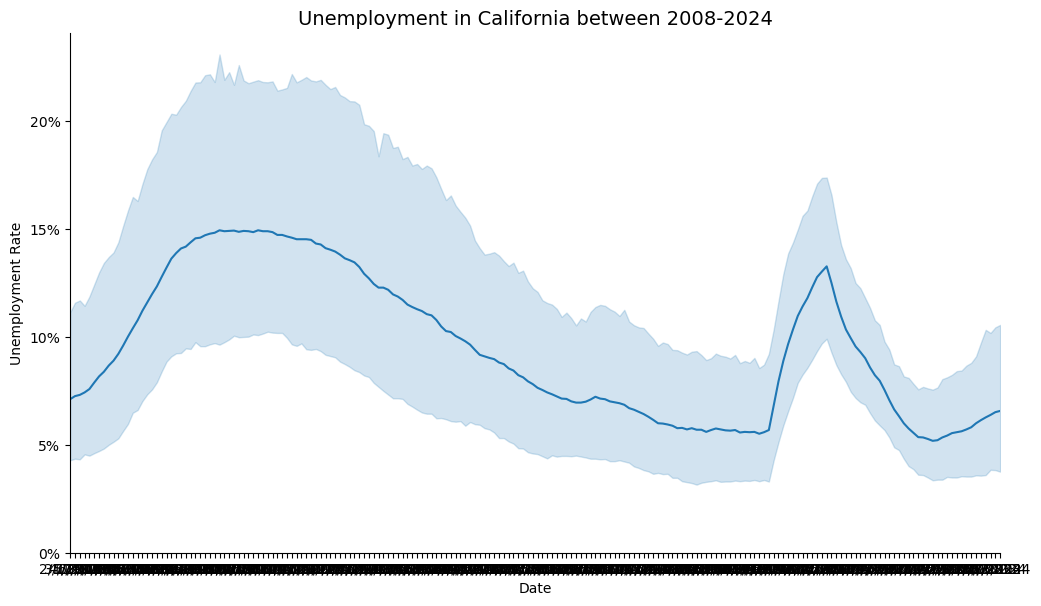

In [40]:
# Trying out Seaborn visualization

plt.figure(figsize = (12, 6.75))

# uses seaborn visualization with x-axis = date, y-axis = unemployment rate
ax = sns.lineplot(data = unemp_melt, x = 'Date', y = 'Unemployment Rate')

# title
plt.title("Unemployment in California between 2008-2024", fontsize = 14)

# set the 0 at the axis
ax.margins(x=0)

#converst the y_axis numbers to percentage with 100% as max and no decimal places
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 0))

# sets first date at the axis
plt.ylim(0)

sns.despine()

plt.show()